# MNIST Classification 
In this notebook, I trained a basic neural network architecture (784 nodes in input layer and 10 nodes in the output layer) to classify handwritten digits in MNIST dataset.

MNIST Dataset Description:

MNIST consists of images of handwritten digits and annotated labels. It has 55,000 training examples, 10,000 test examples, and 5,000 validation examples. Each image is [28x28] which are futher flattened into 784-dimentional vector.

### Import required libraries

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Reading input data
We will use one-hot encoded dataset. Since each image has 10 possible outcome (digits between 0 & 9); y label is a 10-dimentional vector with 1 at the position of actual value and 0 elsewhere. For example, for '5' label, one-hot encoded y vector would be [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]. In tensorflow, we use placeholder to allocate a variable without specifying its value. We use a matrix of size [None, 784] for input set (x). 784, because each image is a 784-dimentional vector and for None we can use any batch size of training examples when we run the tensorflow session. 

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
x = tf.placeholder(tf.float32, [None, 784])

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Defining learning parameters
We need to define weight matrix and bias vector. In tensorflow, we use Variable to allocate parameters, whose values can be modified and it keeps on updating during the course of training. Intially, we start as 0 values, later these will learn correct values when trained. weight matrix is of size [784, 10] as we have 784 nodes in the input layer and 10 nodes in the output layer and bias is of size [10], one for each node in the output layer.

In [3]:
w = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

### Defining model
As common in case of multinomial logistic regression setting, we will use softmax to predict final probabilities for each class label. Softmax is a function that takes an exponential of input and then normalizes across all outcomes, making sure final values are between 0 and 1 and all sum to 1. Thereby, we will get 10 probability values, corresponding to each label.

In [4]:
y = tf.nn.softmax(tf.matmul(x, w) + b)

### Loss Function
We will use cross entropy loss function to evaluate the performance of the model. Cross Entropy is a good measure of the distance between two vectors. Our predicted outcome is 10-dimentional vector and actual y is also a 10-dimentional one-hot encoded vector. To calculate cross entropy, we multiply the actual with the natural log of predicted (element-wise vector-vector multiplication), sum across all labels, take the negative, and average across all training examples in the batch.

In [5]:
y_actual = tf.placeholder(tf.float32, [None, 10])
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_actual * tf.log(y), axis=1))

### Learning: Loss Optimization
We will use Gradient Descent approach with a learning rate of 0.5 to minimize the loss and learn set of parameters corresponding to it.

In [6]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
model = optimizer.minimize(cross_entropy_loss)

### Run session and train model
Now, we have completely defined our model setting, we will run tensorflow session to train the model and make predictions. We now need to specify values corresponding to placeholders we defined above. Using feed_dict parameter, we can specify that. We will train the model for 500 epochs and taking a batch of size 1000 everytime.

In [7]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
errors = []
for i in range(500):
    batch_x, batch_y = mnist.train.next_batch(1000)
    sess.run(model, feed_dict={x: batch_x, y_actual: batch_y})
    errors.append(sess.run(cross_entropy_loss, feed_dict={x: batch_x, y_actual: batch_y}))
    print("Epoch: ", i, " Loss: ", sess.run(cross_entropy_loss, feed_dict={x: batch_x, y_actual: batch_y}))    

Epoch:  0  Loss:  1.8240145
Epoch:  1  Loss:  1.4856853
Epoch:  2  Loss:  1.29777
Epoch:  3  Loss:  1.1449692
Epoch:  4  Loss:  1.0818826
Epoch:  5  Loss:  1.0199984
Epoch:  6  Loss:  0.9232876
Epoch:  7  Loss:  0.87336594
Epoch:  8  Loss:  0.79566485
Epoch:  9  Loss:  0.7973891
Epoch:  10  Loss:  0.7552764
Epoch:  11  Loss:  0.7342116
Epoch:  12  Loss:  0.67302346
Epoch:  13  Loss:  0.7166495
Epoch:  14  Loss:  0.6647964
Epoch:  15  Loss:  0.6608578
Epoch:  16  Loss:  0.65861726
Epoch:  17  Loss:  0.60451865
Epoch:  18  Loss:  0.5774278
Epoch:  19  Loss:  0.6175776
Epoch:  20  Loss:  0.5846618
Epoch:  21  Loss:  0.5706455
Epoch:  22  Loss:  0.58040255
Epoch:  23  Loss:  0.5583881
Epoch:  24  Loss:  0.5352429
Epoch:  25  Loss:  0.56317955
Epoch:  26  Loss:  0.5889739
Epoch:  27  Loss:  0.5774548
Epoch:  28  Loss:  0.5065908
Epoch:  29  Loss:  0.5319141
Epoch:  30  Loss:  0.45385665
Epoch:  31  Loss:  0.4873725
Epoch:  32  Loss:  0.5176194
Epoch:  33  Loss:  0.4855755
Epoch:  34  Loss: 

Epoch:  275  Loss:  0.35426497
Epoch:  276  Loss:  0.31579626
Epoch:  277  Loss:  0.36119753
Epoch:  278  Loss:  0.341708
Epoch:  279  Loss:  0.28720033
Epoch:  280  Loss:  0.30637145
Epoch:  281  Loss:  0.36458987
Epoch:  282  Loss:  0.31679085
Epoch:  283  Loss:  0.3510657
Epoch:  284  Loss:  0.33915004
Epoch:  285  Loss:  0.31909406
Epoch:  286  Loss:  0.31999454
Epoch:  287  Loss:  0.2965994
Epoch:  288  Loss:  0.32825837
Epoch:  289  Loss:  0.39512363
Epoch:  290  Loss:  0.31622604
Epoch:  291  Loss:  0.37748408
Epoch:  292  Loss:  0.29533336
Epoch:  293  Loss:  0.2963316
Epoch:  294  Loss:  0.30499396
Epoch:  295  Loss:  0.3190484
Epoch:  296  Loss:  0.32237095
Epoch:  297  Loss:  0.2969245
Epoch:  298  Loss:  0.3283108
Epoch:  299  Loss:  0.27997813
Epoch:  300  Loss:  0.30717748
Epoch:  301  Loss:  0.3222513
Epoch:  302  Loss:  0.30012438
Epoch:  303  Loss:  0.29656655
Epoch:  304  Loss:  0.30306783
Epoch:  305  Loss:  0.32527736
Epoch:  306  Loss:  0.31295845
Epoch:  307  Loss

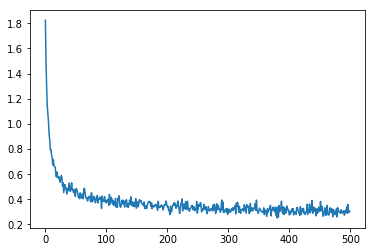

In [8]:
plt.plot(range(500), errors)

### Model evaluation
We can compare labels corresponding to maximum probability in the predicted vector to the max in the actual y vector. argmax method with axis = 1 (row-wise) can be handy here.

In [9]:
corr_pred = tf.equal(tf.argmax(y, 1), tf.argmax(y_actual, 1))
accuracy = tf.reduce_mean(tf.cast(corr_pred, tf.float32))
print("Overall Accuracy over test set: ", sess.run(accuracy, feed_dict={x: mnist.test.images, y_actual: mnist.test.labels}))

Overall Accuracy over test set:  0.9171
